In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

input_folder = "/content/drive/MyDrive/Yugesh/Yuges"   # your folder
output_folder = "/content/augmented"
os.makedirs(output_folder, exist_ok=True)

valid_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.webp']

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

count = 0
target_count = 20

for filename in os.listdir(input_folder):

    # skip if folder or non-image file
    if not filename.lower().endswith(tuple(valid_extensions)):
        continue

    img_path = os.path.join(input_folder, filename)
    img = load_img(img_path)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    for batch in datagen.flow(x, batch_size=1,
                              save_to_dir=output_folder,
                              save_prefix='aug',
                              save_format='jpg'):
        count += 1
        if count >= target_count:
            break

    if count >= target_count:
        break

print(f"✔ Created {count} augmented images in: {output_folder}")

✔ Created 20 augmented images in: /content/augmented


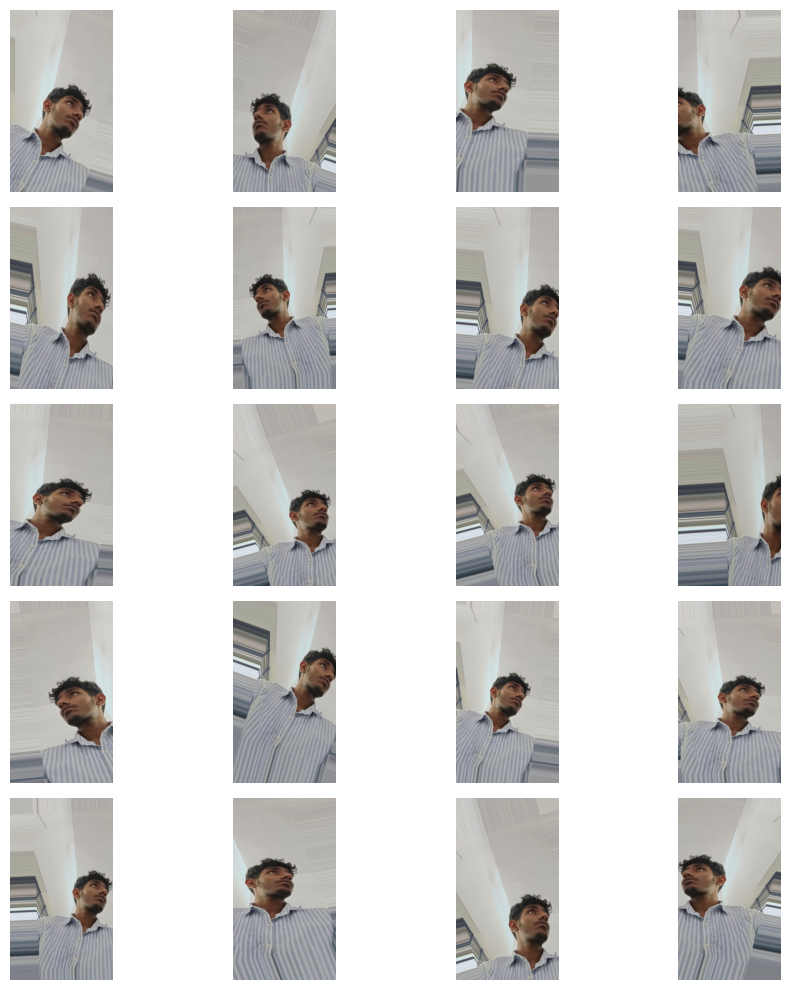

In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

output_folder = "/content/augmented"   # your augmented images folder

# List all image files
files = sorted(os.listdir(output_folder))

# Show first N images (you can change this)
num_images = min(20, len(files))   # preview 20 if available

plt.figure(figsize=(10,10))

for i in range(num_images):
    img_path = os.path.join(output_folder, files[i])
    img = load_img(img_path)

    plt.subplot(5, 4, i+1)    # 5 rows × 4 columns grid
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()